## 1. Experiment: Central Limit Theorem (CLT)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
rng = np.random.default_rng(42)

Population mean≈0.998, std≈0.998


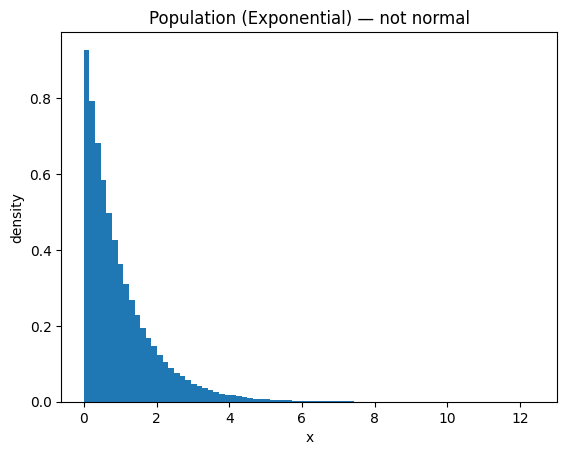

In [9]:
N_POP = 500_000
population = rng.exponential(scale=1.0, size=N_POP)
pop_mu, pop_sigma = population.mean(), population.std(ddof=0)
print(f"Population mean≈{pop_mu:.3f}, std≈{pop_sigma:.3f}")
plt.hist(population, bins=80, density=True)
plt.title("Population (Exponential) — not normal")
plt.xlabel("x"); plt.ylabel("density"); plt.show()

n=1:   mean≈1.001,  std≈0.985 (theory σ/√n≈0.998)


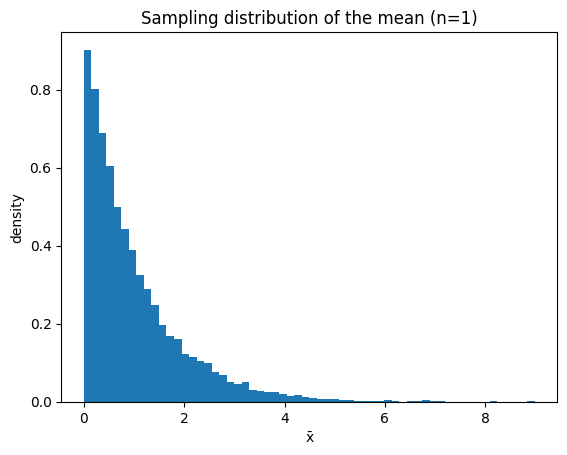

n=5:   mean≈0.997,  std≈0.440 (theory σ/√n≈0.446)


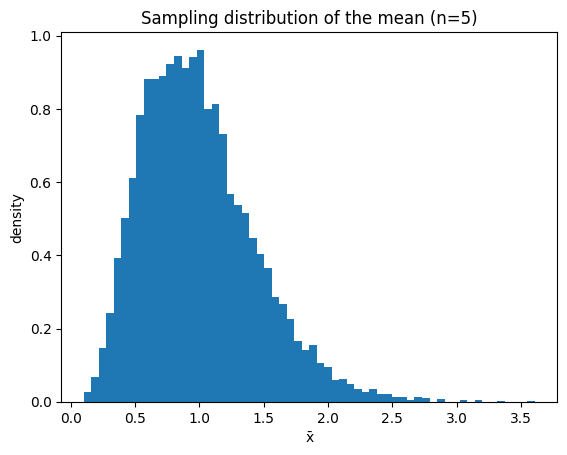

n=10:   mean≈1.004,  std≈0.311 (theory σ/√n≈0.316)


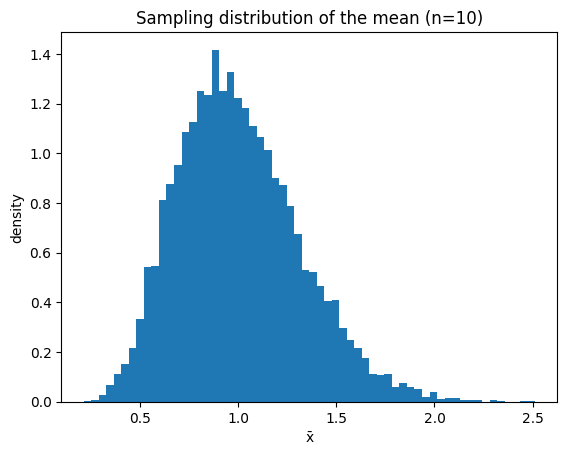

n=30:   mean≈0.996,  std≈0.182 (theory σ/√n≈0.182)


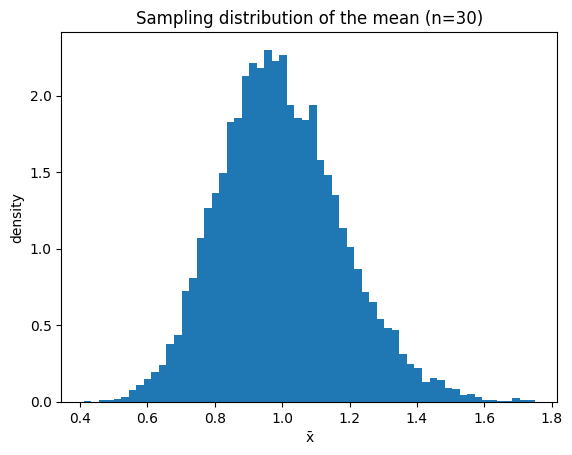

n=100:   mean≈0.998,  std≈0.101 (theory σ/√n≈0.100)


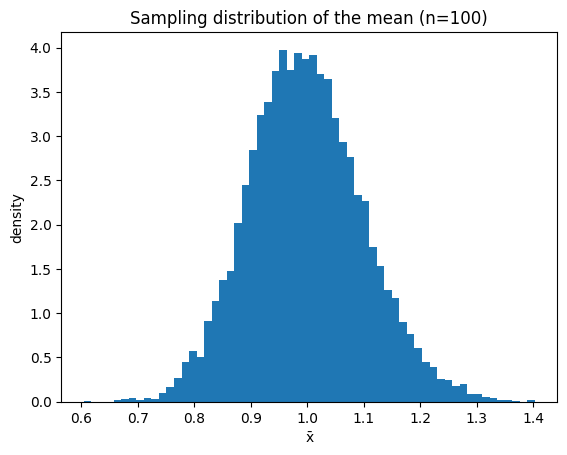

In [10]:
def sample_means(pop, n, reps=10_000):
    samples = rng.choice(pop, size=(reps, n), replace=True)
    return samples.mean(axis=1)

for n in [1, 5, 10, 30, 100]:
    means = sample_means(population, n, reps=10_000)
    print(f"n={n}:   mean≈{means.mean():.3f},  std≈{means.std(ddof=0):.3f} (theory σ/√n≈{pop_sigma/np.sqrt(n):.3f})")
    plt.hist(means, bins=60, density=True)
    plt.title(f"Sampling distribution of the mean (n={n})")
    plt.xlabel("x̄"); plt.ylabel("density"); plt.show()

## 2. Experiment: Law of Large Numbers (LLN)

Final running mean≈1.003 vs population mean≈0.998


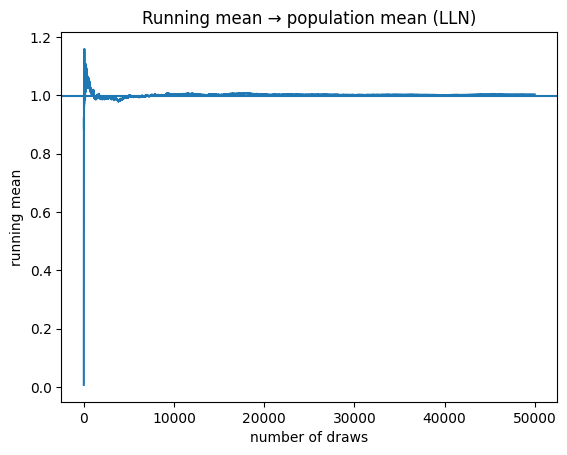

In [11]:
T = 50_000
draws = rng.choice(population, size=T, replace=True)
running_mean = np.cumsum(draws) / np.arange(1, T+1)

print(f"Final running mean≈{running_mean[-1]:.3f} vs population mean≈{pop_mu:.3f}")
plt.plot(running_mean)
plt.axhline(pop_mu)
plt.title("Running mean → population mean (LLN)")
plt.xlabel("number of draws"); plt.ylabel("running mean"); plt.show()

In [ ]:
eps = 0.05 * pop_mu  
for n in [5, 10, 30, 100, 300, 1000]:
    means = sample_means(population, n, reps=5000)
    prob_within = np.mean(np.abs(means - pop_mu) < eps)
    print(f"n={n:<4}  P(|x̄-μ| < 5%·μ) ≈ {prob_within:.3f}")

n=5     P(|x̄-μ| < 5%·μ) ≈ 0.091
n=10    P(|x̄-μ| < 5%·μ) ≈ 0.128
n=30    P(|x̄-μ| < 5%·μ) ≈ 0.213
n=100   P(|x̄-μ| < 5%·μ) ≈ 0.384
n=300   P(|x̄-μ| < 5%·μ) ≈ 0.610
n=1000  P(|x̄-μ| < 5%·μ) ≈ 0.891
